## Predicting Crime Categories

#### Importing train data 

In [105]:
import pandas as pd

df_train_origin = pd.read_csv("train.csv")
print(df_train_origin.head())

                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.4387

#### Importing test data 

In [207]:
import pandas as pd

df_test_origin = pd.read_csv("test.csv")
#print(df_test_origin)

#### Information about the data

In [106]:
df_train_origin.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [206]:
df_train_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


#### Mapping of column weekday

In [108]:
#all different weekdays
pd.unique(df_train_origin["DayOfWeek"])

array(['Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday',
       'Thursday'], dtype=object)

In [109]:
#dict weekday
dict_weekday = {"Monday" : 1, "Tuesday" : 2, "Wednesday" : 3, "Thursday" : 4, "Friday" : 5, "Saturday" : 6, "Sunday" : 7 }
print(dict_weekday)

{'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}


In [110]:
#maped column "DayOfWeek"
weekdays = df_train_origin["DayOfWeek"].map(dict_weekday).fillna(df_train_origin["DayOfWeek"]).astype(int)

#### Mapping of column category

In [111]:
#all different categories
pd.unique(df_train_origin["Category"])

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

In [112]:
dict_category = {}
index = 1
for i in pd.unique(df_train_origin["Category"]):
    val = {i : index}
    dict_category.update(val)
    index+=1

print(dict_category)

{'WARRANTS': 1, 'OTHER OFFENSES': 2, 'LARCENY/THEFT': 3, 'VEHICLE THEFT': 4, 'VANDALISM': 5, 'NON-CRIMINAL': 6, 'ROBBERY': 7, 'ASSAULT': 8, 'WEAPON LAWS': 9, 'BURGLARY': 10, 'SUSPICIOUS OCC': 11, 'DRUNKENNESS': 12, 'FORGERY/COUNTERFEITING': 13, 'DRUG/NARCOTIC': 14, 'STOLEN PROPERTY': 15, 'SECONDARY CODES': 16, 'TRESPASS': 17, 'MISSING PERSON': 18, 'FRAUD': 19, 'KIDNAPPING': 20, 'RUNAWAY': 21, 'DRIVING UNDER THE INFLUENCE': 22, 'SEX OFFENSES FORCIBLE': 23, 'PROSTITUTION': 24, 'DISORDERLY CONDUCT': 25, 'ARSON': 26, 'FAMILY OFFENSES': 27, 'LIQUOR LAWS': 28, 'BRIBERY': 29, 'EMBEZZLEMENT': 30, 'SUICIDE': 31, 'LOITERING': 32, 'SEX OFFENSES NON FORCIBLE': 33, 'EXTORTION': 34, 'GAMBLING': 35, 'BAD CHECKS': 36, 'TREA': 37, 'RECOVERED VEHICLE': 38, 'PORNOGRAPHY/OBSCENE MAT': 39}


In [113]:
#maped column "Category"
categories = df_train_origin["Category"].map(dict_category).fillna(df_train_origin["Category"]).astype(int)

#### Mapping of column PdDistrict

In [114]:
#all different police department district
pd.unique(df_train_origin["PdDistrict"])

array(['NORTHERN', 'PARK', 'INGLESIDE', 'BAYVIEW', 'RICHMOND', 'CENTRAL',
       'TARAVAL', 'TENDERLOIN', 'MISSION', 'SOUTHERN'], dtype=object)

In [115]:
dict_PdDistrict = {}
index = 1
for i in pd.unique(df_train_origin["PdDistrict"]):
    val = {i : index}
    dict_PdDistrict.update(val)
    index+=1

print(dict_PdDistrict)

{'NORTHERN': 1, 'PARK': 2, 'INGLESIDE': 3, 'BAYVIEW': 4, 'RICHMOND': 5, 'CENTRAL': 6, 'TARAVAL': 7, 'TENDERLOIN': 8, 'MISSION': 9, 'SOUTHERN': 10}


In [116]:
#maped column "Category"
pdDistricts = df_train_origin["PdDistrict"].map(dict_PdDistrict).fillna(df_train_origin["PdDistrict"]).astype(int)

#### Mapping of all Resolutions

In [117]:
#all different Resolutions
pd.unique(df_train_origin["Resolution"])

array(['ARREST, BOOKED', 'NONE', 'ARREST, CITED', 'PSYCHOPATHIC CASE',
       'JUVENILE BOOKED', 'UNFOUNDED', 'EXCEPTIONAL CLEARANCE', 'LOCATED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'NOT PROSECUTED',
       'JUVENILE DIVERTED', 'COMPLAINANT REFUSES TO PROSECUTE',
       'JUVENILE ADMONISHED', 'JUVENILE CITED',
       'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
       'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE'],
      dtype=object)

In [118]:
dict_Resolutions = {}
index = 1
for i in pd.unique(df_train_origin["Resolution"]):
    val = {i : index}
    dict_Resolutions.update(val)
    index+=1

print(dict_Resolutions)

{'ARREST, BOOKED': 1, 'NONE': 2, 'ARREST, CITED': 3, 'PSYCHOPATHIC CASE': 4, 'JUVENILE BOOKED': 5, 'UNFOUNDED': 6, 'EXCEPTIONAL CLEARANCE': 7, 'LOCATED': 8, 'CLEARED-CONTACT JUVENILE FOR MORE INFO': 9, 'NOT PROSECUTED': 10, 'JUVENILE DIVERTED': 11, 'COMPLAINANT REFUSES TO PROSECUTE': 12, 'JUVENILE ADMONISHED': 13, 'JUVENILE CITED': 14, 'DISTRICT ATTORNEY REFUSES TO PROSECUTE': 15, 'PROSECUTED BY OUTSIDE AGENCY': 16, 'PROSECUTED FOR LESSER OFFENSE': 17}


In [119]:
#maped column "Resolution"
resolutions = df_train_origin["Resolution"].map(dict_Resolutions).fillna(df_train_origin["Resolution"]).astype(int)

#### Mapping of all descriptions

In [120]:
#all different Descriptions
pd.unique(df_train_origin["Descript"])

array(['WARRANT ARREST', 'TRAFFIC VIOLATION ARREST',
       'GRAND THEFT FROM LOCKED AUTO', 'GRAND THEFT FROM UNLOCKED AUTO',
       'STOLEN AUTOMOBILE', 'PETTY THEFT FROM LOCKED AUTO',
       'MISCELLANEOUS INVESTIGATION',
       'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES', 'FOUND PROPERTY',
       'ROBBERY, ARMED WITH A KNIFE',
       'AGGRAVATED ASSAULT WITH BODILY FORCE', 'TRAFFIC VIOLATION',
       'ROBBERY, BODILY FORCE',
       'STAY AWAY OR COURT ORDER, NON-DV RELATED', 'LOST PROPERTY',
       'ATTEMPTED THEFT FROM LOCKED VEHICLE', 'CIVIL SIDEWALKS, CITATION',
       'MALICIOUS MISCHIEF, VANDALISM', 'SUSPICIOUS PACKAGE',
       'AIDED CASE, MENTAL DISTURBED', 'PETTY THEFT SHOPLIFTING',
       'PROBATION VIOLATION', 'STAY AWAY ORDER VIOLATION, DV RELATED',
       'DRIVERS LICENSE, SUSPENDED OR REVOKED', 'STOLEN MOTORCYCLE',
       'GRAND THEFT FROM PERSON', 'BURGLARY, VEHICLE (ARREST MADE)',
       'ATTEMPTED ROBBERY ON THE STREET WITH BODILY FORCE',
       'PETTY THEFT FROM A B

In [121]:
dict_Descriptions = {}
index = 1
for i in pd.unique(df_train_origin["Descript"]):
    val = {i : index}
    dict_Descriptions.update(val)
    index+=1

print(dict_Descriptions)

{'WARRANT ARREST': 1, 'TRAFFIC VIOLATION ARREST': 2, 'GRAND THEFT FROM LOCKED AUTO': 3, 'GRAND THEFT FROM UNLOCKED AUTO': 4, 'STOLEN AUTOMOBILE': 5, 'PETTY THEFT FROM LOCKED AUTO': 6, 'MISCELLANEOUS INVESTIGATION': 7, 'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES': 8, 'FOUND PROPERTY': 9, 'ROBBERY, ARMED WITH A KNIFE': 10, 'AGGRAVATED ASSAULT WITH BODILY FORCE': 11, 'TRAFFIC VIOLATION': 12, 'ROBBERY, BODILY FORCE': 13, 'STAY AWAY OR COURT ORDER, NON-DV RELATED': 14, 'LOST PROPERTY': 15, 'ATTEMPTED THEFT FROM LOCKED VEHICLE': 16, 'CIVIL SIDEWALKS, CITATION': 17, 'MALICIOUS MISCHIEF, VANDALISM': 18, 'SUSPICIOUS PACKAGE': 19, 'AIDED CASE, MENTAL DISTURBED': 20, 'PETTY THEFT SHOPLIFTING': 21, 'PROBATION VIOLATION': 22, 'STAY AWAY ORDER VIOLATION, DV RELATED': 23, 'DRIVERS LICENSE, SUSPENDED OR REVOKED': 24, 'STOLEN MOTORCYCLE': 25, 'GRAND THEFT FROM PERSON': 26, 'BURGLARY, VEHICLE (ARREST MADE)': 27, 'ATTEMPTED ROBBERY ON THE STREET WITH BODILY FORCE': 28, 'PETTY THEFT FROM A BUILDING': 29, '

In [122]:
#maped column "Descriptions"
descriptions = df_train_origin["Descript"].map(dict_Descriptions).fillna(df_train_origin["Descript"]).astype(int)

#### Mapping of all addresses

In [123]:
#all different Addresses
pd.unique(df_train_origin["Address"]).size

23228

In [124]:
dict_Addresses = {}
index = 1
for i in pd.unique(df_train_origin["Address"]):
    val = {i : index}
    dict_Addresses.update(val)
    index+=1

print(dict_Addresses)

{'OAK ST / LAGUNA ST': 1, 'VANNESS AV / GREENWICH ST': 2, '1500 Block of LOMBARD ST': 3, '100 Block of BRODERICK ST': 4, '0 Block of TEDDY AV': 5, 'AVALON AV / PERU AV': 6, 'KIRKWOOD AV / DONAHUE ST': 7, '600 Block of 47TH AV': 8, 'JEFFERSON ST / LEAVENWORTH ST': 9, '0 Block of ESCOLTA WY': 10, 'TURK ST / JONES ST': 11, 'FILLMORE ST / GEARY BL': 12, '200 Block of WILLIAMS AV': 13, '0 Block of MENDELL ST': 14, 'EDDY ST / JONES ST': 15, 'GODEUS ST / MISSION ST': 16, 'MENDELL ST / HUDSON AV': 17, '100 Block of JONES ST': 18, '200 Block of EVELYN WY': 19, '1600 Block of VALENCIA ST': 20, 'FILLMORE ST / LOMBARD ST': 21, '300 Block of OFARRELL ST': 22, '2000 Block of BUSH ST': 23, '500 Block of COLLEGE AV': 24, '19TH AV / SANTIAGO ST': 25, '2000 Block of 41ST AV': 26, '1300 Block of WEBSTER ST': 27, '400 Block of CASTRO ST': 28, '1500 Block of FILLMORE ST': 29, '1600 Block of WEBSTER ST': 30, 'KING ST / 3RD ST': 31, 'VALLEJO ST / BUCHANAN ST': 32, 'CALIFORNIA ST / BUCHANAN ST': 33, '1400 Blo

In [125]:
#maped column "Descriptions"
addresses = df_train_origin["Address"].map(dict_Addresses).fillna(df_train_origin["Address"]).astype(int)

#### Converting Dates to timestamps

In [176]:
df_train_origin.dtypes


Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [210]:
datetimes =  pd.to_datetime(df_train_origin['Dates'])
datetimes

0        2015-05-13 23:53:00
1        2015-05-13 23:53:00
2        2015-05-13 23:33:00
3        2015-05-13 23:30:00
4        2015-05-13 23:30:00
                 ...        
878044   2003-01-06 00:15:00
878045   2003-01-06 00:01:00
878046   2003-01-06 00:01:00
878047   2003-01-06 00:01:00
878048   2003-01-06 00:01:00
Name: Dates, Length: 878049, dtype: datetime64[ns]

#### Generating mapped dataFrame

In [200]:
data_new = { "Category": categories, "Descript": descriptions, "DayOfWeek": weekdays,
            "PdDistrict": pdDistricts, "Resolution" : resolutions, "Address": addresses,
            "X": df_train_origin["X"], "Y":df_train_origin["Y"] }

In [201]:
df_train_mapped = pd.DataFrame(data_new)
print(df_train_mapped)

        Category  Descript  DayOfWeek  PdDistrict  Resolution  Address  \
0              1         1          3           1           1        1   
1              2         2          3           1           1        1   
2              2         2          3           1           1        2   
3              3         3          3           1           2        3   
4              3         3          3           2           2        4   
...          ...       ...        ...         ...         ...      ...   
878044         7       240          1           7           2    16121   
878045         3         3          1           3           2    13578   
878046         3         3          1          10           2     4418   
878047         5         8          1          10           2     2094   
878048        13       441          1           4           2    22105   

                 X          Y  
0      -122.425892  37.774599  
1      -122.425892  37.774599  
2      -122.424

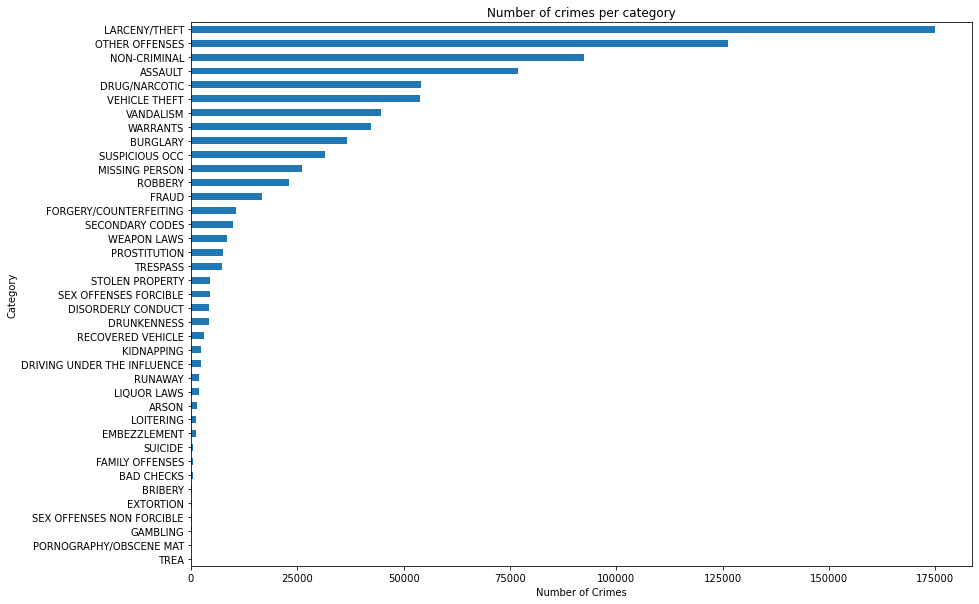

In [267]:

plt.figure(figsize=(14,10))
plt.title('Number of crimes per category')
plt.ylabel('Category')
plt.xlabel('Number of Crimes')


df_train_mapped.groupby([df_train_origin['Category']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()